In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


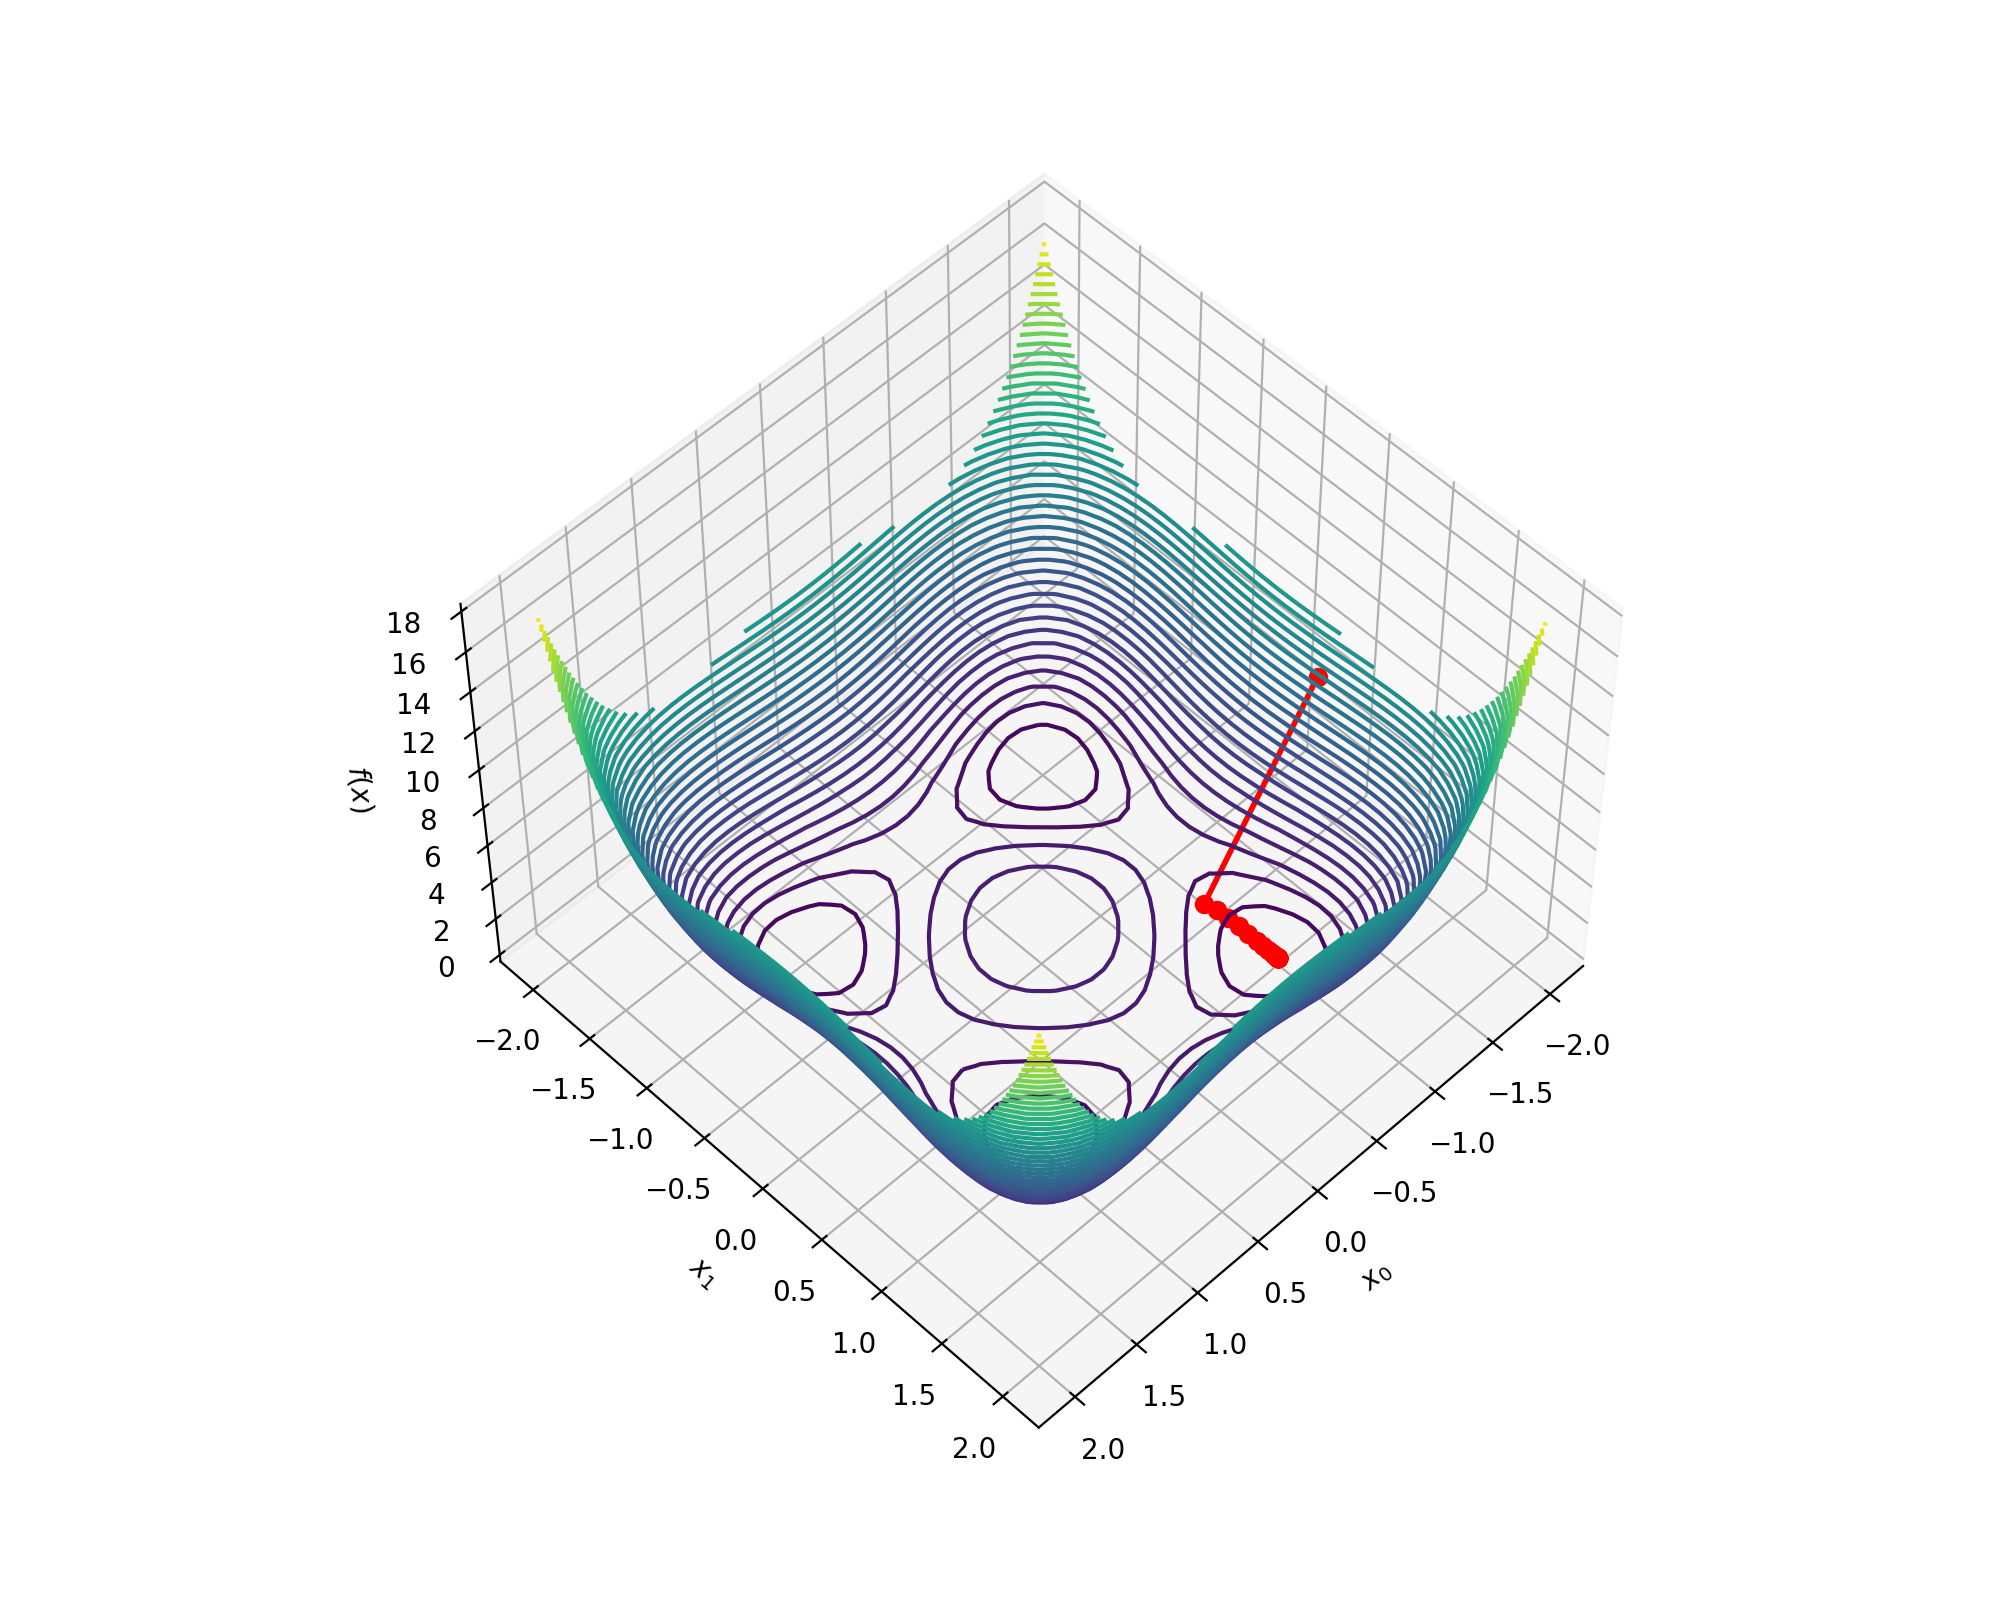

In [40]:

%matplotlib notebook
# Define the double well function and its gradient for SGD
def double_well_f(x, a=1, b=1):
    return a * ((x[0]**2 - b**2)**2 + (x[1]**2 - b**2)**2)

def double_well_df(x, a=1, b=1):
    grad_x = 4 * a * x[0] * (x[0]**2 - b**2)
    grad_y = 4 * a * x[1] * (x[1]**2 - b**2)
    return np.array([grad_x, grad_y])

# Stochastic Gradient Descent (SGD) implementation
def sgd(target_df, x0=np.zeros(2), lstep=0.01, max_iter=10, tol=1e-6):
    results = np.array([x0])
    gradf = target_df(x0)
    steps_count = 0
    x = x0

    while np.linalg.norm(gradf) > tol and steps_count < max_iter:
        x = x - lstep * gradf
        results = np.append(results, [x], axis=0)
        gradf = target_df(x)
        steps_count += 1

    return results, steps_count

# Define the grid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
Z = double_well_f(np.array([X, Y]))

# Run SGD from a specific starting point
starting_point = np.array([-1.9, .4])
points, iters = sgd(double_well_df, x0=starting_point, lstep=0.05, max_iter=100)

# Extracting SGD path for plotting
X_estimate, Y_estimate = points[:, 0], points[:, 1]
Z_estimate = double_well_f(np.array([X_estimate, Y_estimate]))

# Plotting
fig = plt.figure(figsize=(10, 8))

# 3D contour plot with SGD path
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=2, marker='o')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(30, 45)

plt.show()


^^so this shows the double well potential with the gd method inacted on it, its clear even when the method is statred near the middle and off the one side, the method easily finds the minimum. at each step heading in the direction of the steepest negative gradient, ultimatly locating the minimum. notice how the step size decreases as the method comes closer to the minimum as to not pass it up and just land directly on it.

<IPython.core.display.Javascript object>


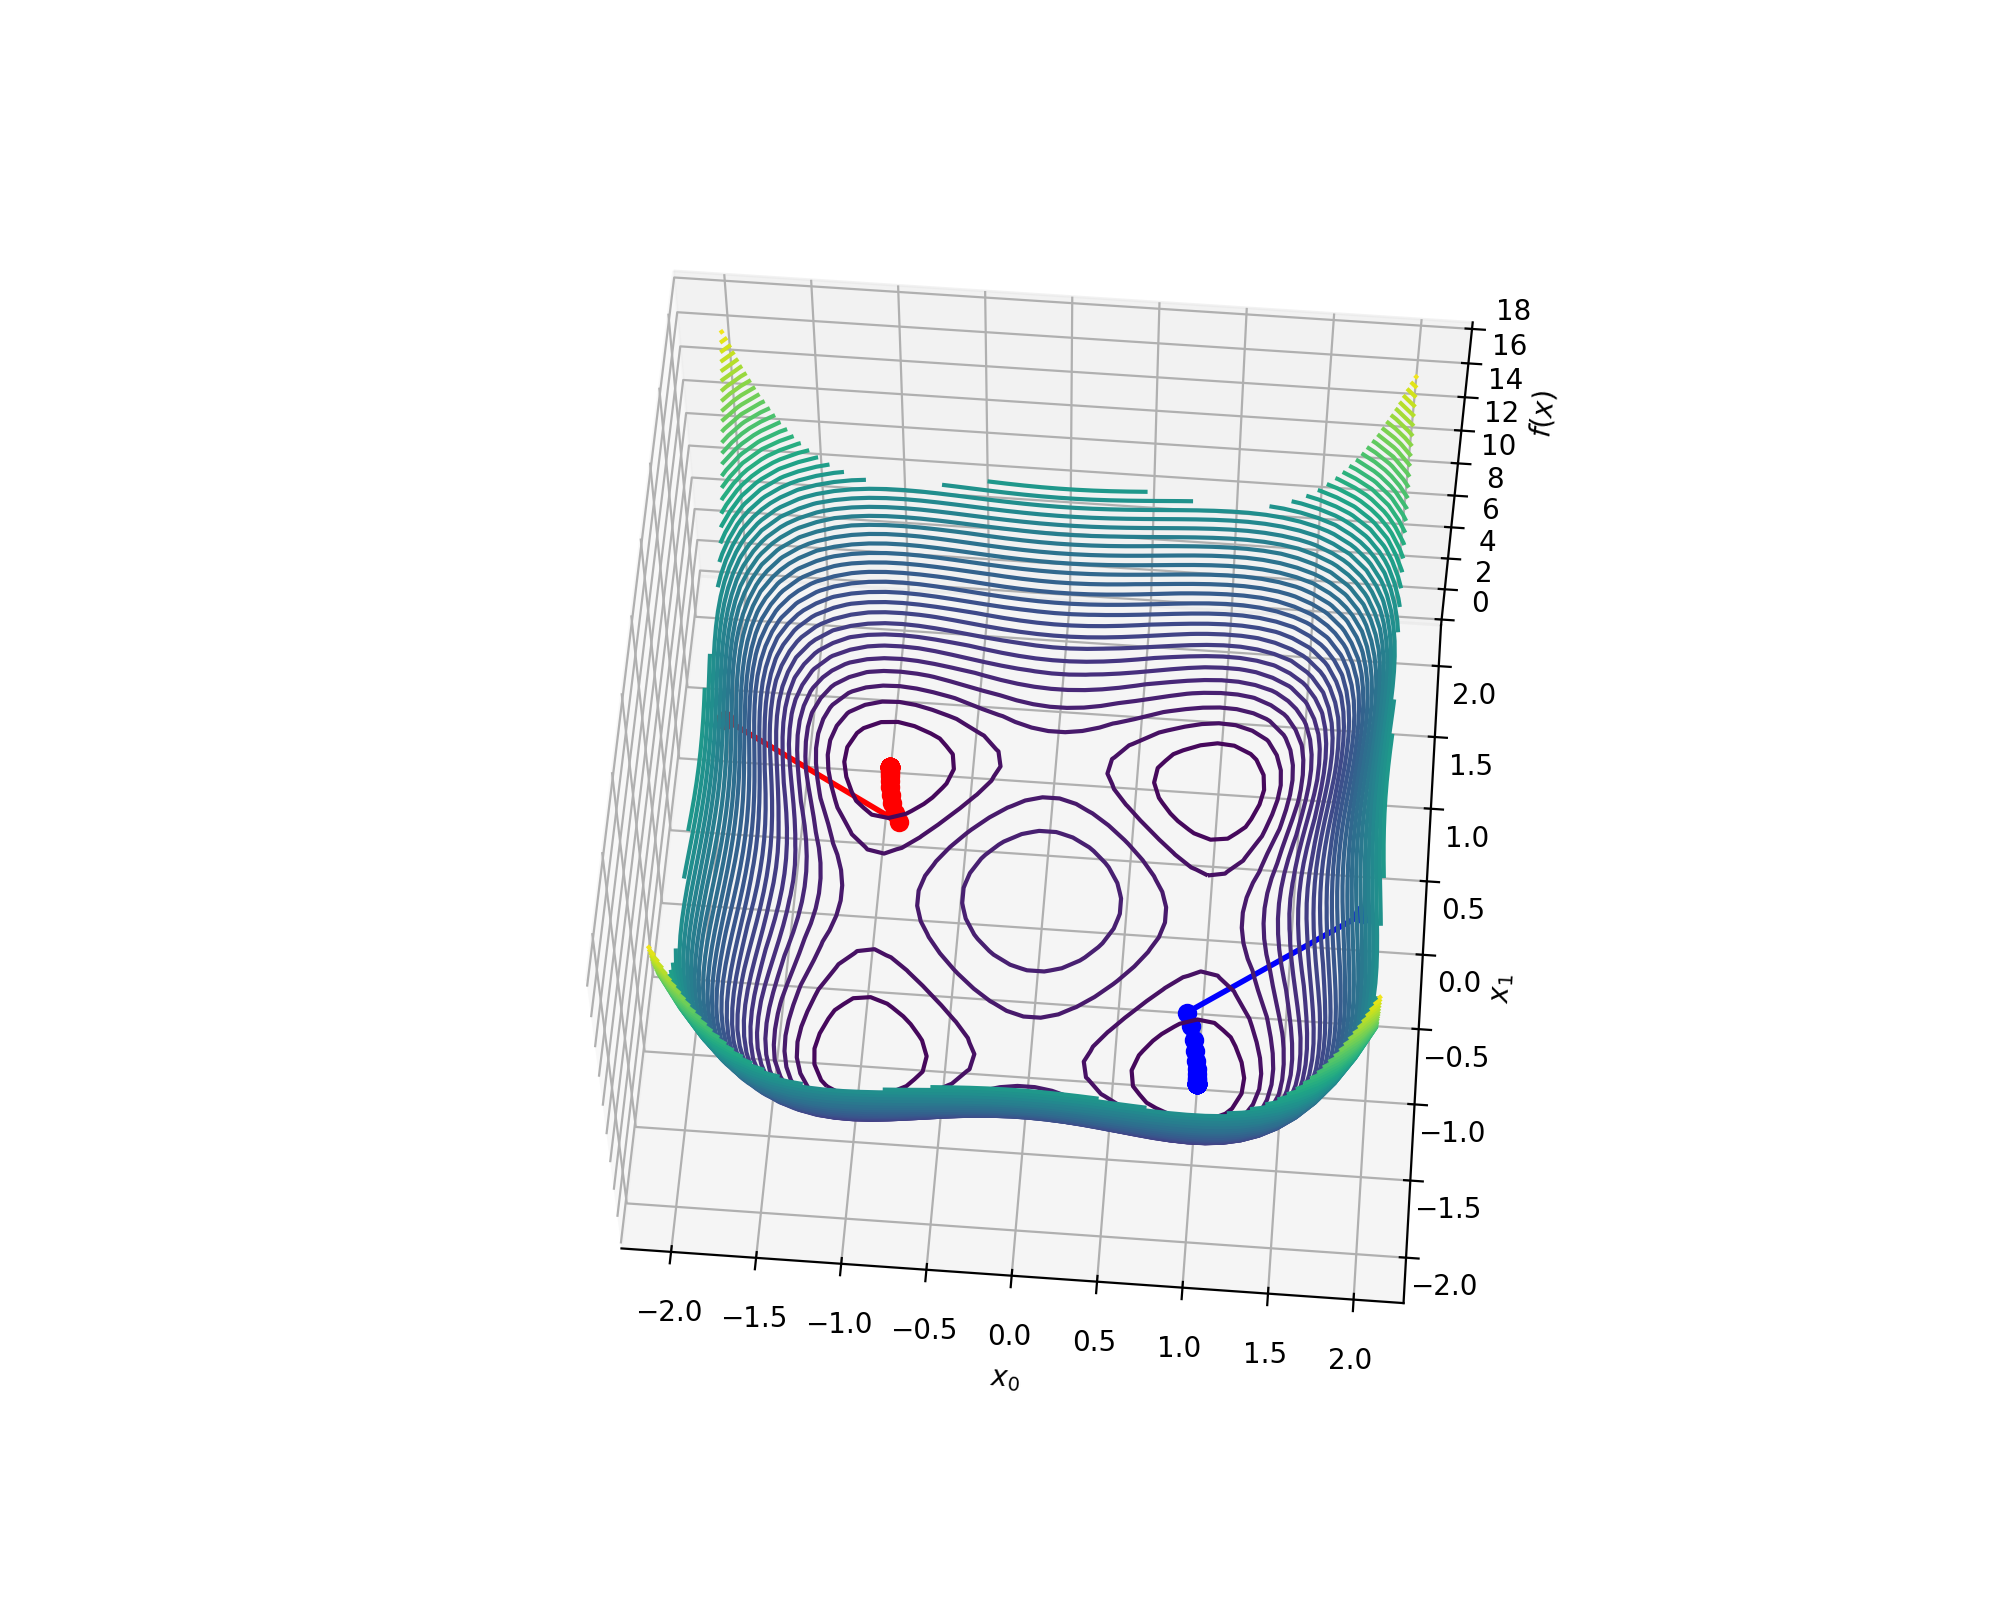

In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# [Existing function definitions]
def double_well_f(x, a=1, b=1):
    return a * ((x[0]**2 - b**2)**2 + (x[1]**2 - b**2)**2)

def double_well_df(x, a=1, b=1):
    grad_x = 4 * a * x[0] * (x[0]**2 - b**2)
    grad_y = 4 * a * x[1] * (x[1]**2 - b**2)
    return np.array([grad_x, grad_y])

# Stochastic Gradient Descent (SGD) implementation
def sgd(target_df, x0=np.zeros(2), lstep=0.01, max_iter=10, tol=1e-6):
    results = np.array([x0])
    gradf = target_df(x0)
    steps_count = 0
    x = x0

    while np.linalg.norm(gradf) > tol and steps_count < max_iter:
        x = x - lstep * gradf
        results = np.append(results, [x], axis=0)
        gradf = target_df(x)
        steps_count += 1

    return results, steps_count

# Define the grid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
Z = double_well_f(np.array([X, Y]))


# Run SGD from two different starting points
starting_points = [np.array([-1.9, .5]), np.array([1.9, -.5])]  # Two different starting points
colors = ['red', 'blue']  # Different colors for different trajectories

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Running SGD for each starting point and plotting
for start, color in zip(starting_points, colors):
    points, iters = sgd(double_well_df, x0=start, lstep=0.05, max_iter=100)
    X_estimate, Y_estimate = points[:, 0], points[:, 1]
    Z_estimate = double_well_f(np.array([X_estimate, Y_estimate]))
    ax.plot(X_estimate, Y_estimate, Z_estimate, color=color, linewidth=2, marker='o')

ax.view_init(30, 45)
plt.show()


^^for this double well function, we want to see how it acts from multiple starting points, on either end of the space. what may seem unpredictable, is to an extent with this method. we can easily start mapping out the attraction basins.

<IPython.core.display.Javascript object>


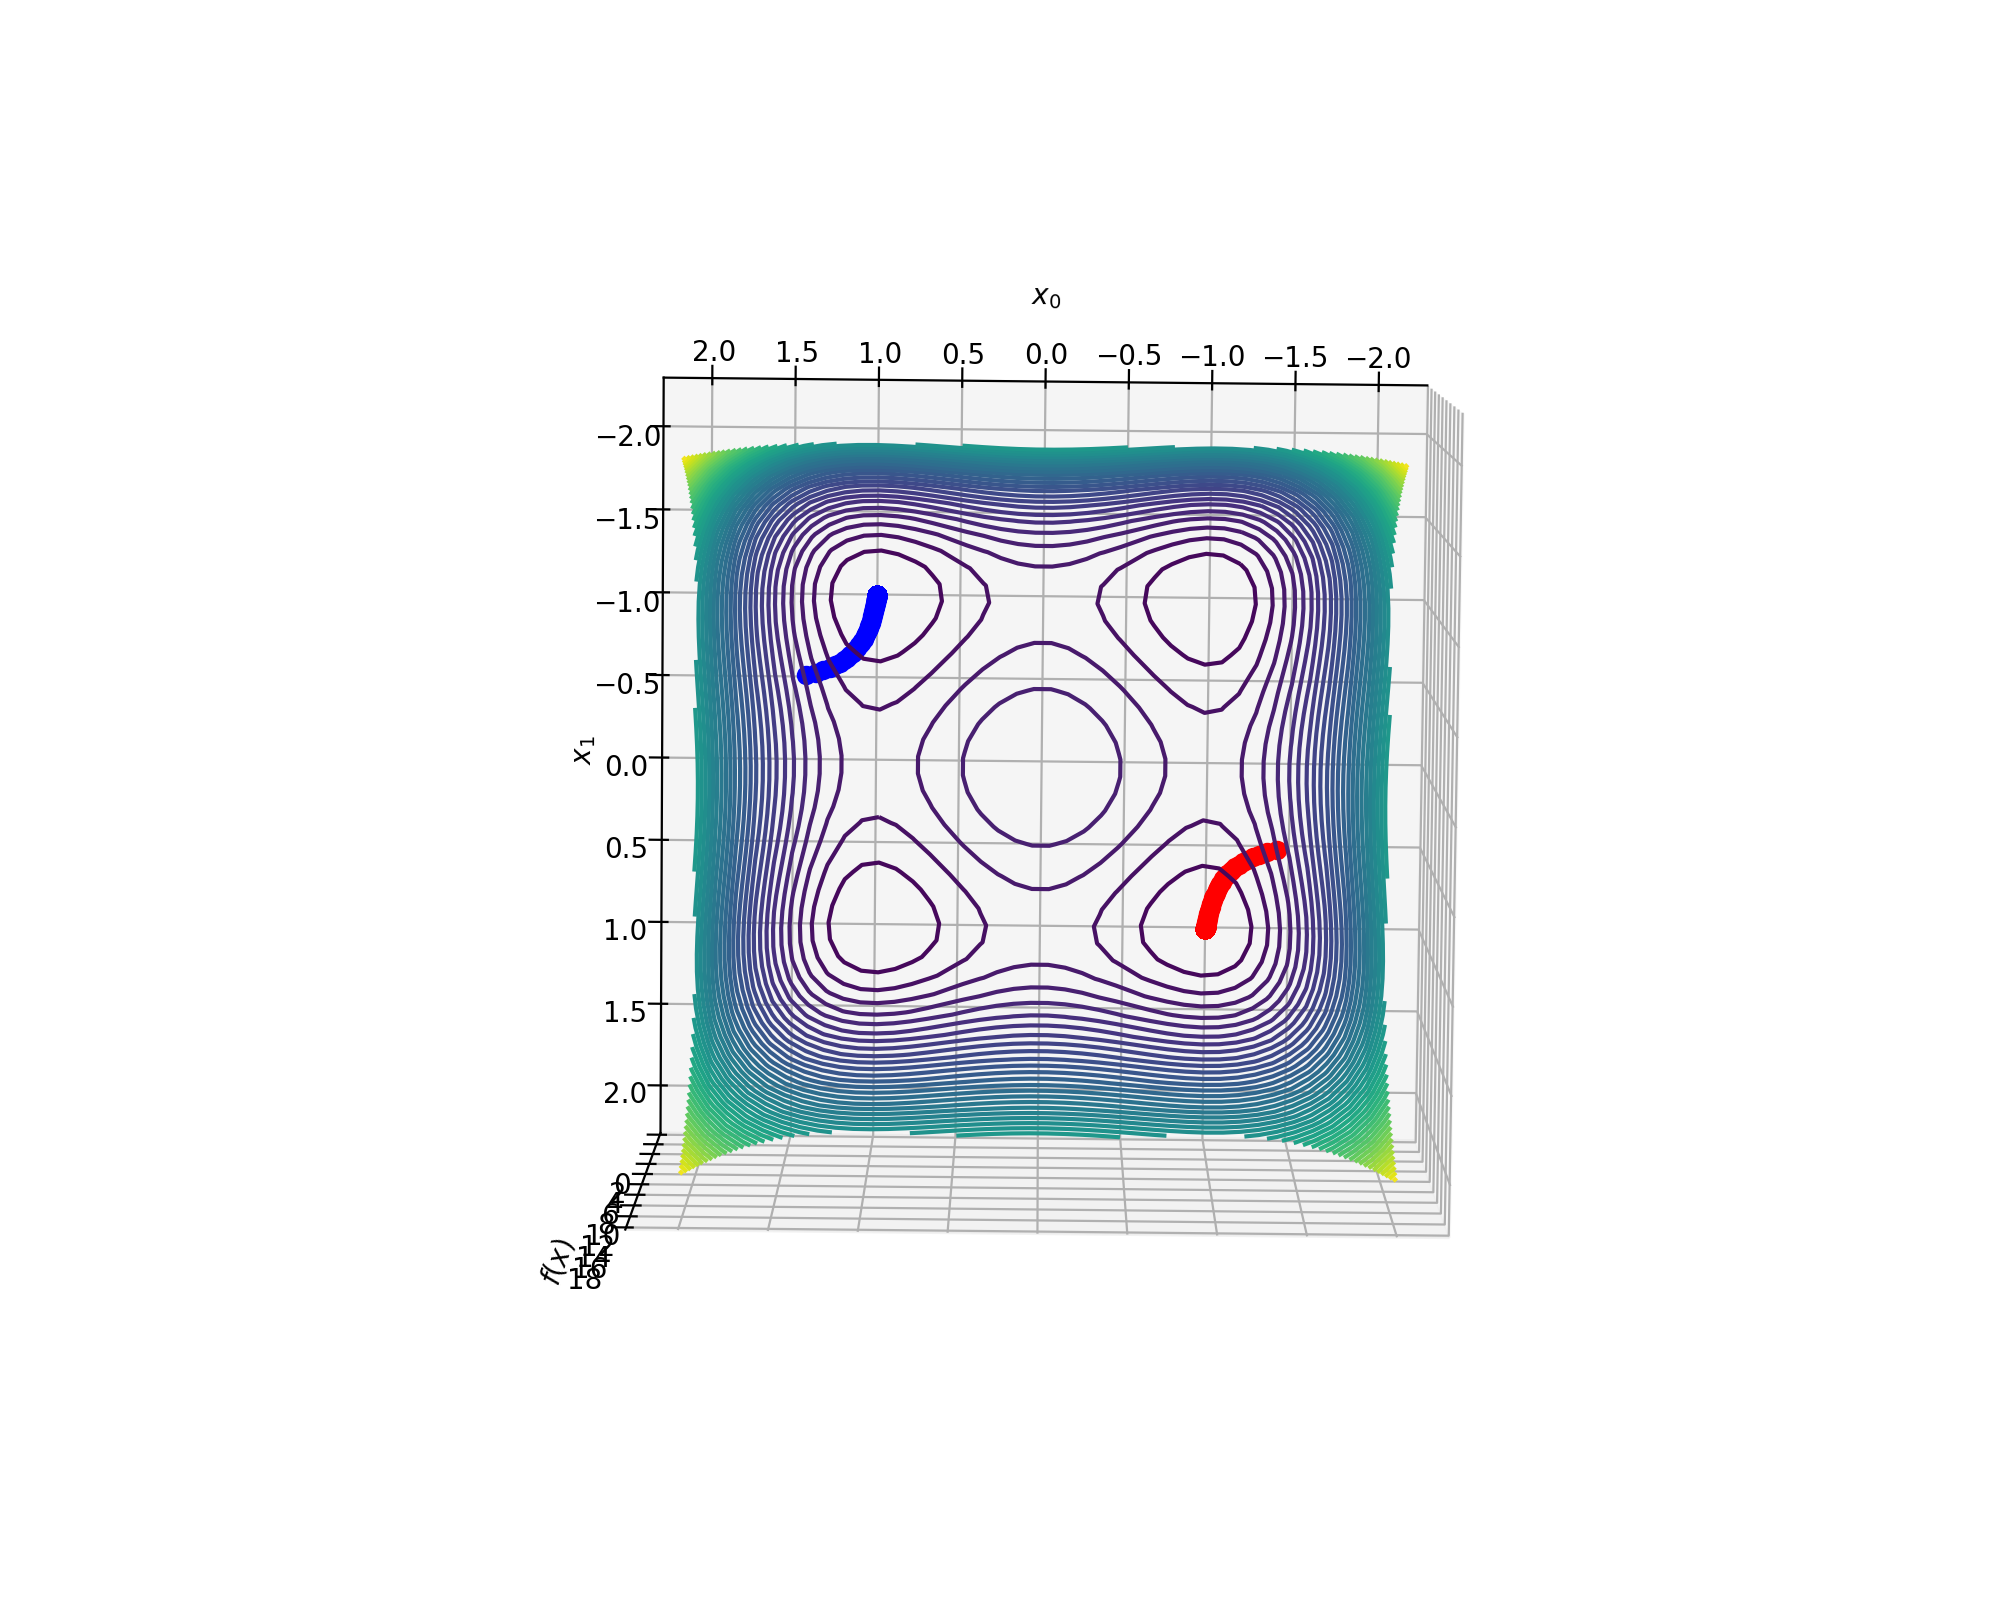

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Double well function definitions
def double_well_f(x, a=1, b=1):
    return a * ((x[0]**2 - b**2)**2 + (x[1]**2 - b**2)**2)

def double_well_df(x, a=1, b=1):
    grad_x = 4 * a * x[0] * (x[0]**2 - b**2)
    grad_y = 4 * a * x[1] * (x[1]**2 - b**2)
    return np.array([grad_x, grad_y])

# Numerical solver for the gradient descent dynamics
def solve_dynamics(target_df, x0, dt=0.01, max_time=10):
    time_steps = int(max_time / dt)
    trajectory = np.zeros((time_steps, 2))
    x = np.array(x0)

    for i in range(time_steps):
        gradient = target_df(x)
        x = x - dt * gradient  # Euler's method
        trajectory[i] = x

    return trajectory

# Define the grid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
Z = double_well_f(np.array([X, Y]))

# Run dynamics solver from two different starting points
starting_points = [np.array([-1.5, 0.5]), np.array([1.5, -0.5])]
colors = ['red', 'blue']

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Running the dynamics solver for each starting point and plotting
for start, color in zip(starting_points, colors):
    trajectory = solve_dynamics(double_well_df, start, dt=0.01, max_time=10)
    ax.plot(trajectory[:, 0], trajectory[:, 1], np.zeros(trajectory.shape[0]), color=color, linewidth=2, marker='o')

ax.view_init(30, 45)
plt.show()


^^now were interested in how particles will move in this space. here start two particles on either end of the function to see how they act. we seee they flow downn the saddle, turning(following the steepest negative gradient at each step), and settling at a respective well.

<IPython.core.display.Javascript object>


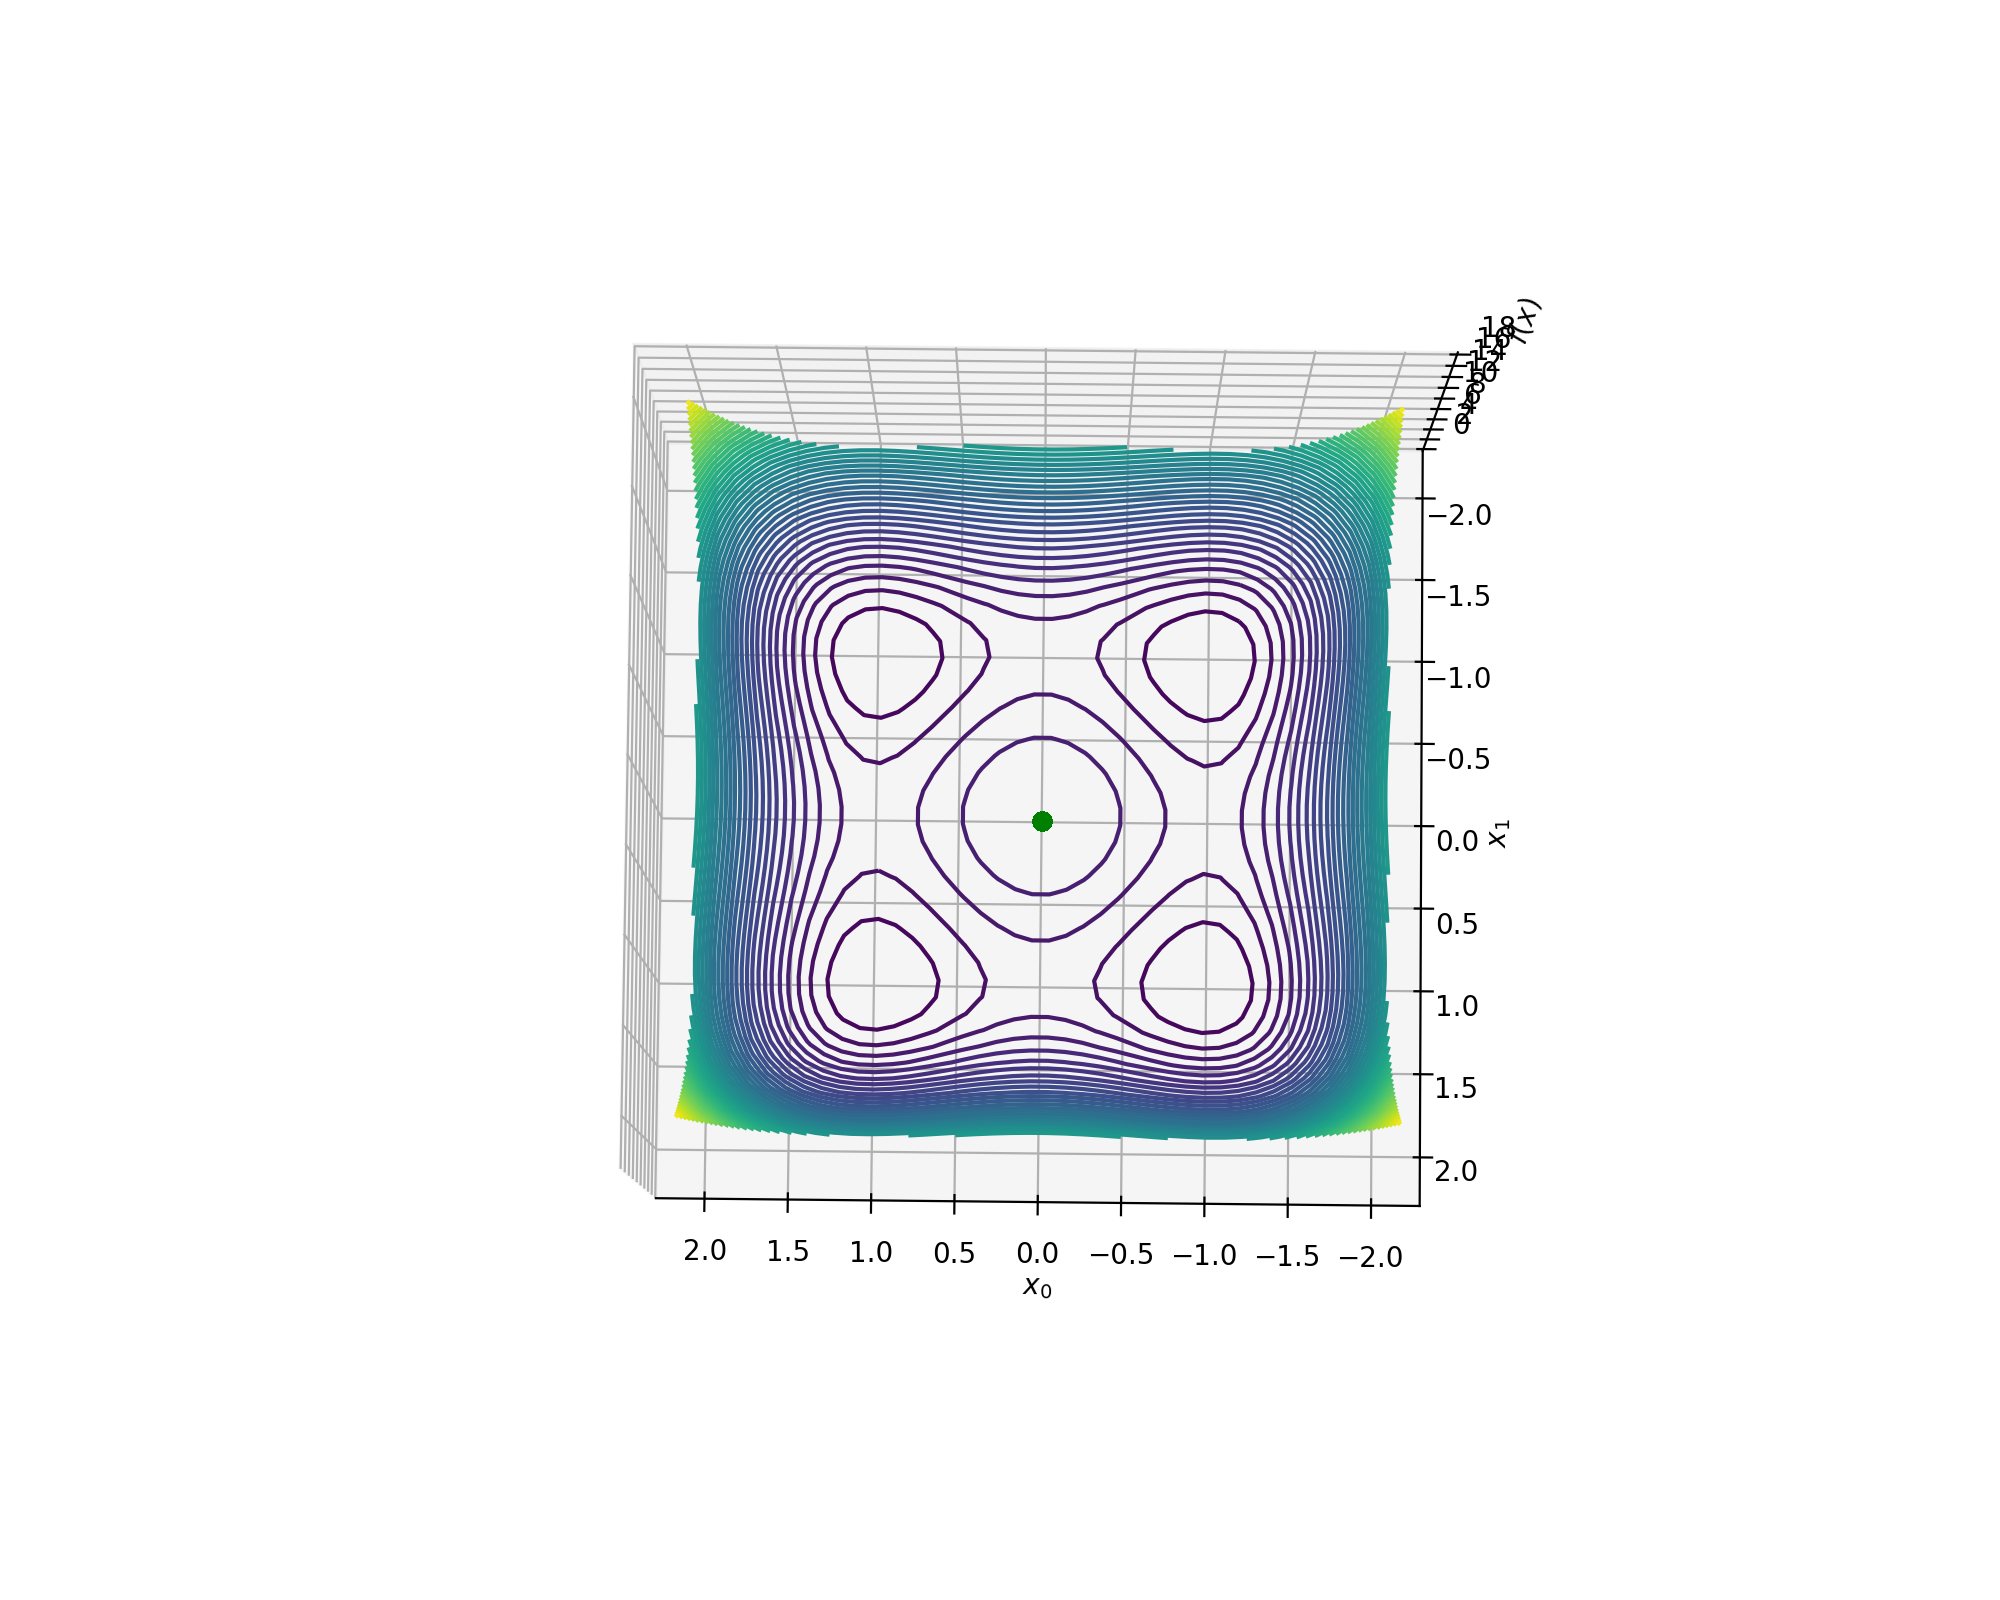

In [21]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Double well function definitions
def double_well_f(x, a=1, b=1):
    return a * ((x[0]**2 - b**2)**2 + (x[1]**2 - b**2)**2)

def double_well_df(x, a=1, b=1):
    grad_x = 4 * a * x[0] * (x[0]**2 - b**2)
    grad_y = 4 * a * x[1] * (x[1]**2 - b**2)
    return np.array([grad_x, grad_y])

# Numerical solver for the gradient descent dynamics
def solve_dynamics(target_df, x0, dt=0.01, max_time=10):
    time_steps = int(max_time / dt)
    trajectory = np.zeros((time_steps, 2))
    x = np.array(x0)

    for i in range(time_steps):
        gradient = target_df(x)
        x = x - dt * gradient  # Euler's method
        trajectory[i] = x

    return trajectory

# Define the grid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
Z = double_well_f(np.array([X, Y]))

# Starting point at the maximum of the potential
starting_point = np.array([0.0, 0.0])

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Running the dynamics solver from the maximum point and plotting
trajectory = solve_dynamics(double_well_df, starting_point, dt=0.01, max_time=10)
ax.plot(trajectory[:, 0], trajectory[:, 1], np.zeros(trajectory.shape[0]), color='green', linewidth=2, marker='o')

ax.view_init(30, 45)
plt.show()


^^here were interested in stability of this function, at a specific point, the maximum. we want to know how a particle will move if placed here and as we see we have an equilibrium point at the maximum. which interesting because that shouldnt be very common.

<IPython.core.display.Javascript object>


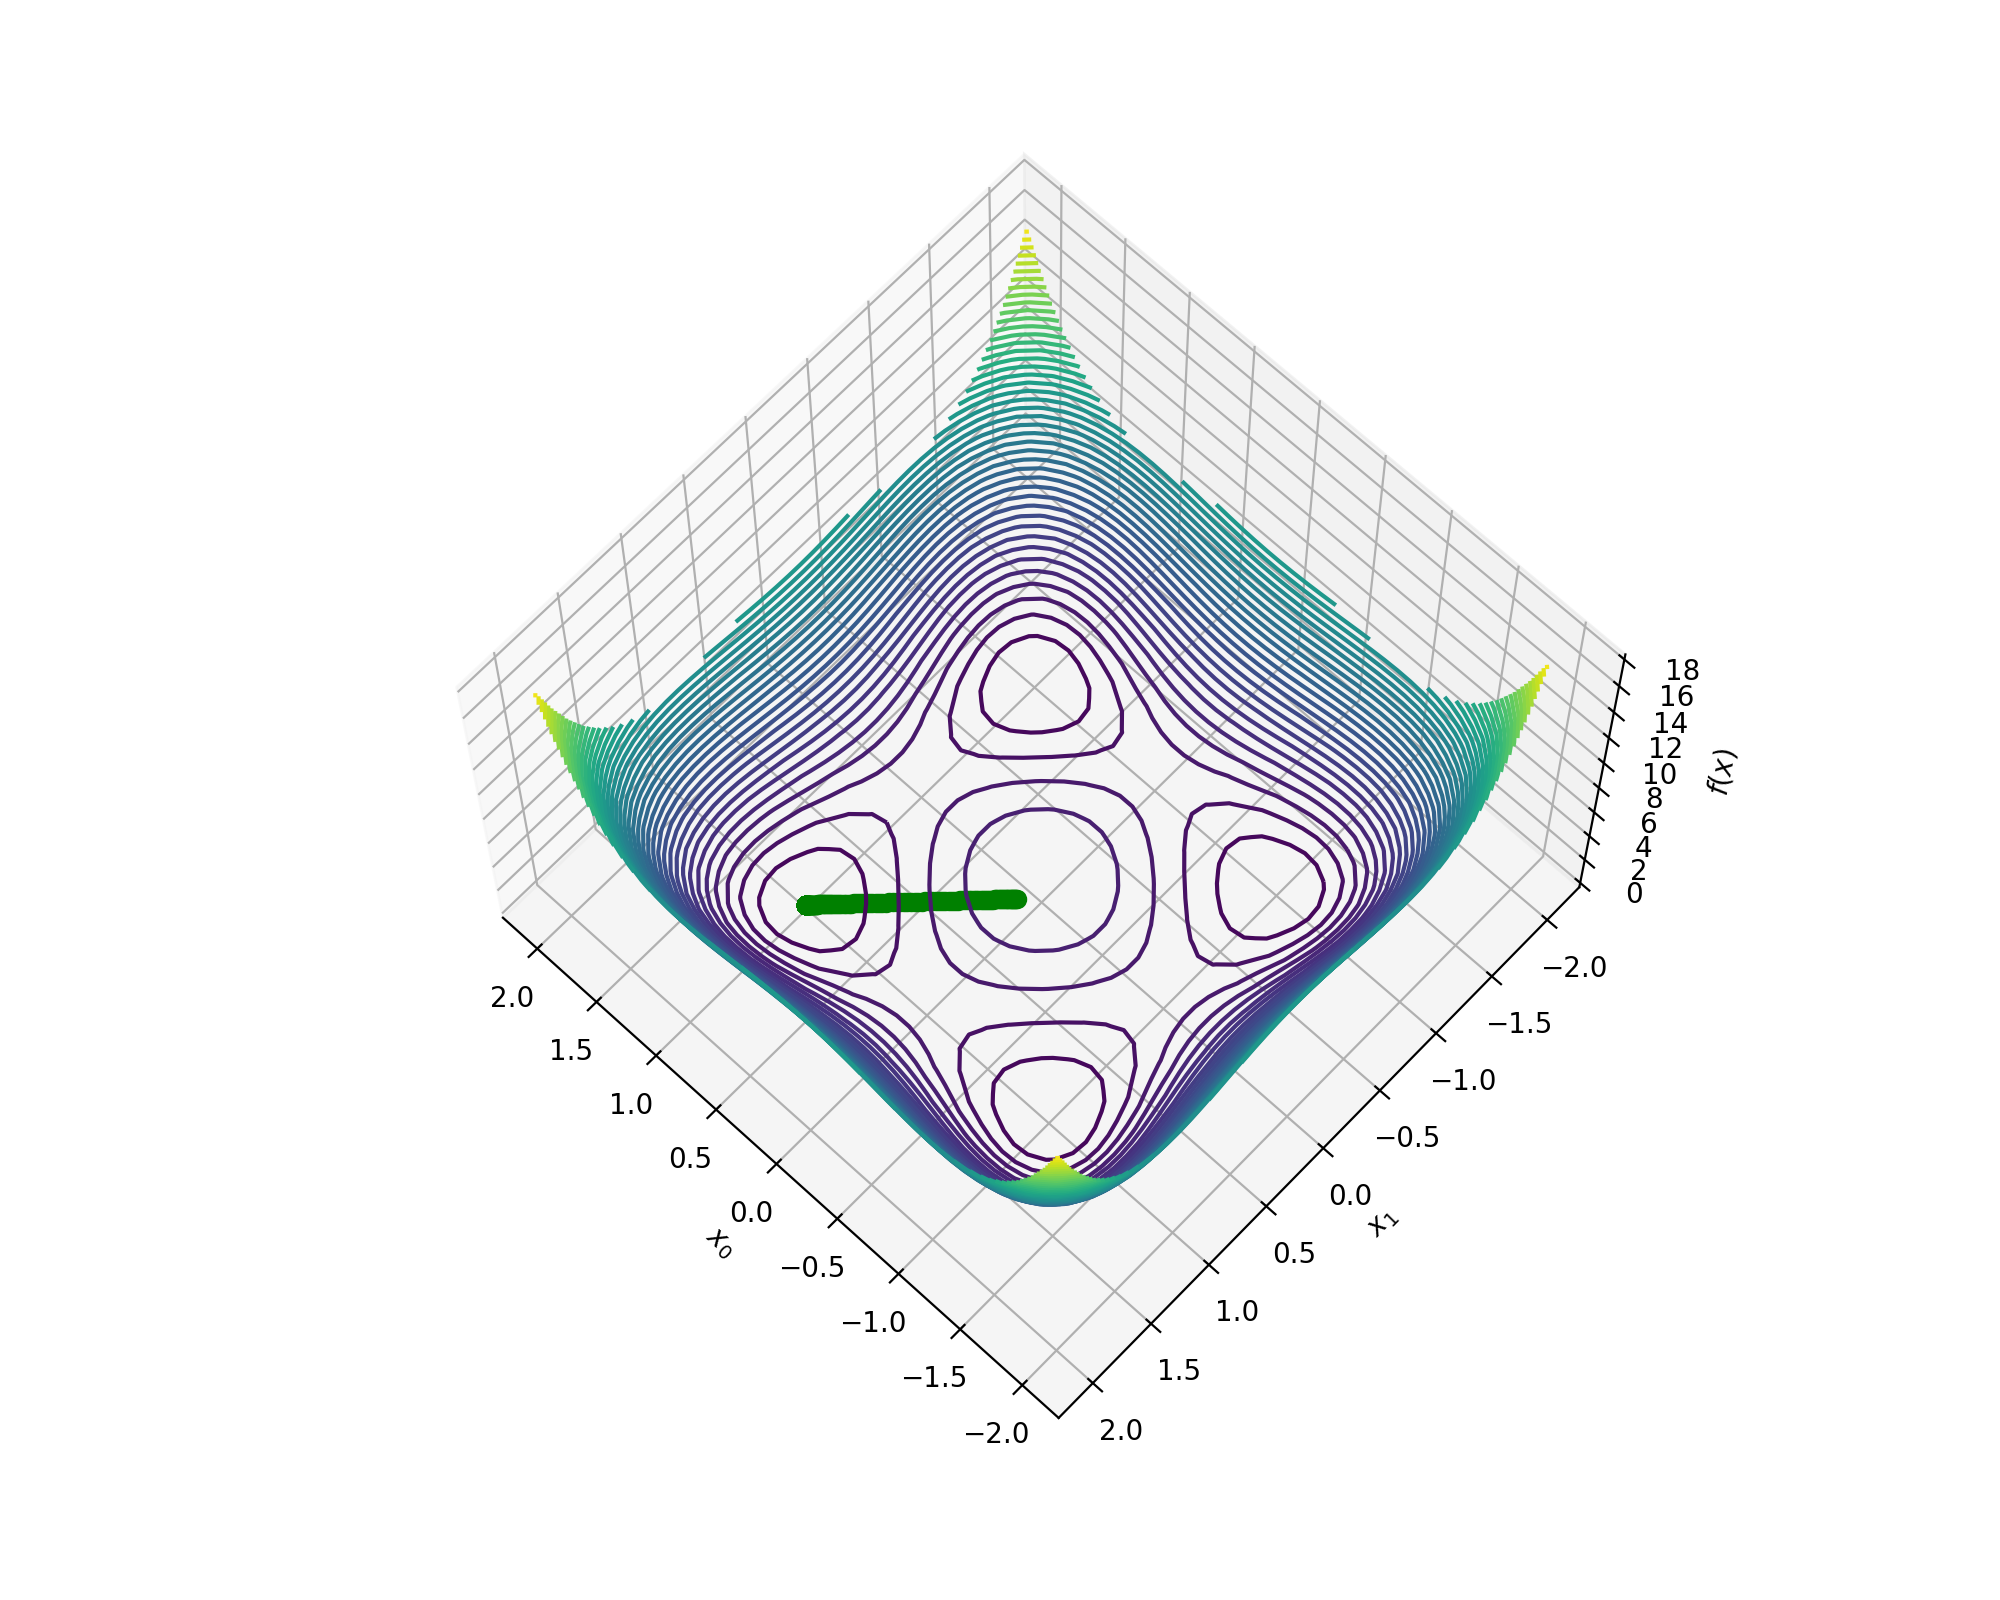

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Double well function definitions
def double_well_f(x, a=1, b=1):
    return a * ((x[0]**2 - b**2)**2 + (x[1]**2 - b**2)**2)

def double_well_df(x, a=1, b=1):
    grad_x = 4 * a * x[0] * (x[0]**2 - b**2)
    grad_y = 4 * a * x[1] * (x[1]**2 - b**2)
    return np.array([grad_x, grad_y])

# Numerical solver for the gradient descent dynamics
def solve_dynamics(target_df, x0, dt=0.01, max_time=10):
    time_steps = int(max_time / dt)
    trajectory = np.zeros((time_steps, 2))
    x = np.array(x0)

    for i in range(time_steps):
        gradient = target_df(x)
        x = x - dt * gradient  # Euler's method
        trajectory[i] = x

    return trajectory

# Define the grid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
Z = double_well_f(np.array([X, Y]))

# Starting point near the maximum of the potential
starting_point_near_max = np.array([0.1, 0.1])  # Slightly off the maximum

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Running the dynamics solver from the point near the maximum and plotting
trajectory_near_max = solve_dynamics(double_well_df, starting_point_near_max, dt=0.01, max_time=10)
ax.plot(trajectory_near_max[:, 0], trajectory_near_max[:, 1], np.zeros(trajectory_near_max.shape[0]), color='green', linewidth=2, marker='o')

ax.view_init(30, 45)
plt.show()


so wehn we start 'near' the quilibrium point, we see the particle move straight to the well. thi sshows a repelling equilibria at the maximum of the function.

<IPython.core.display.Javascript object>


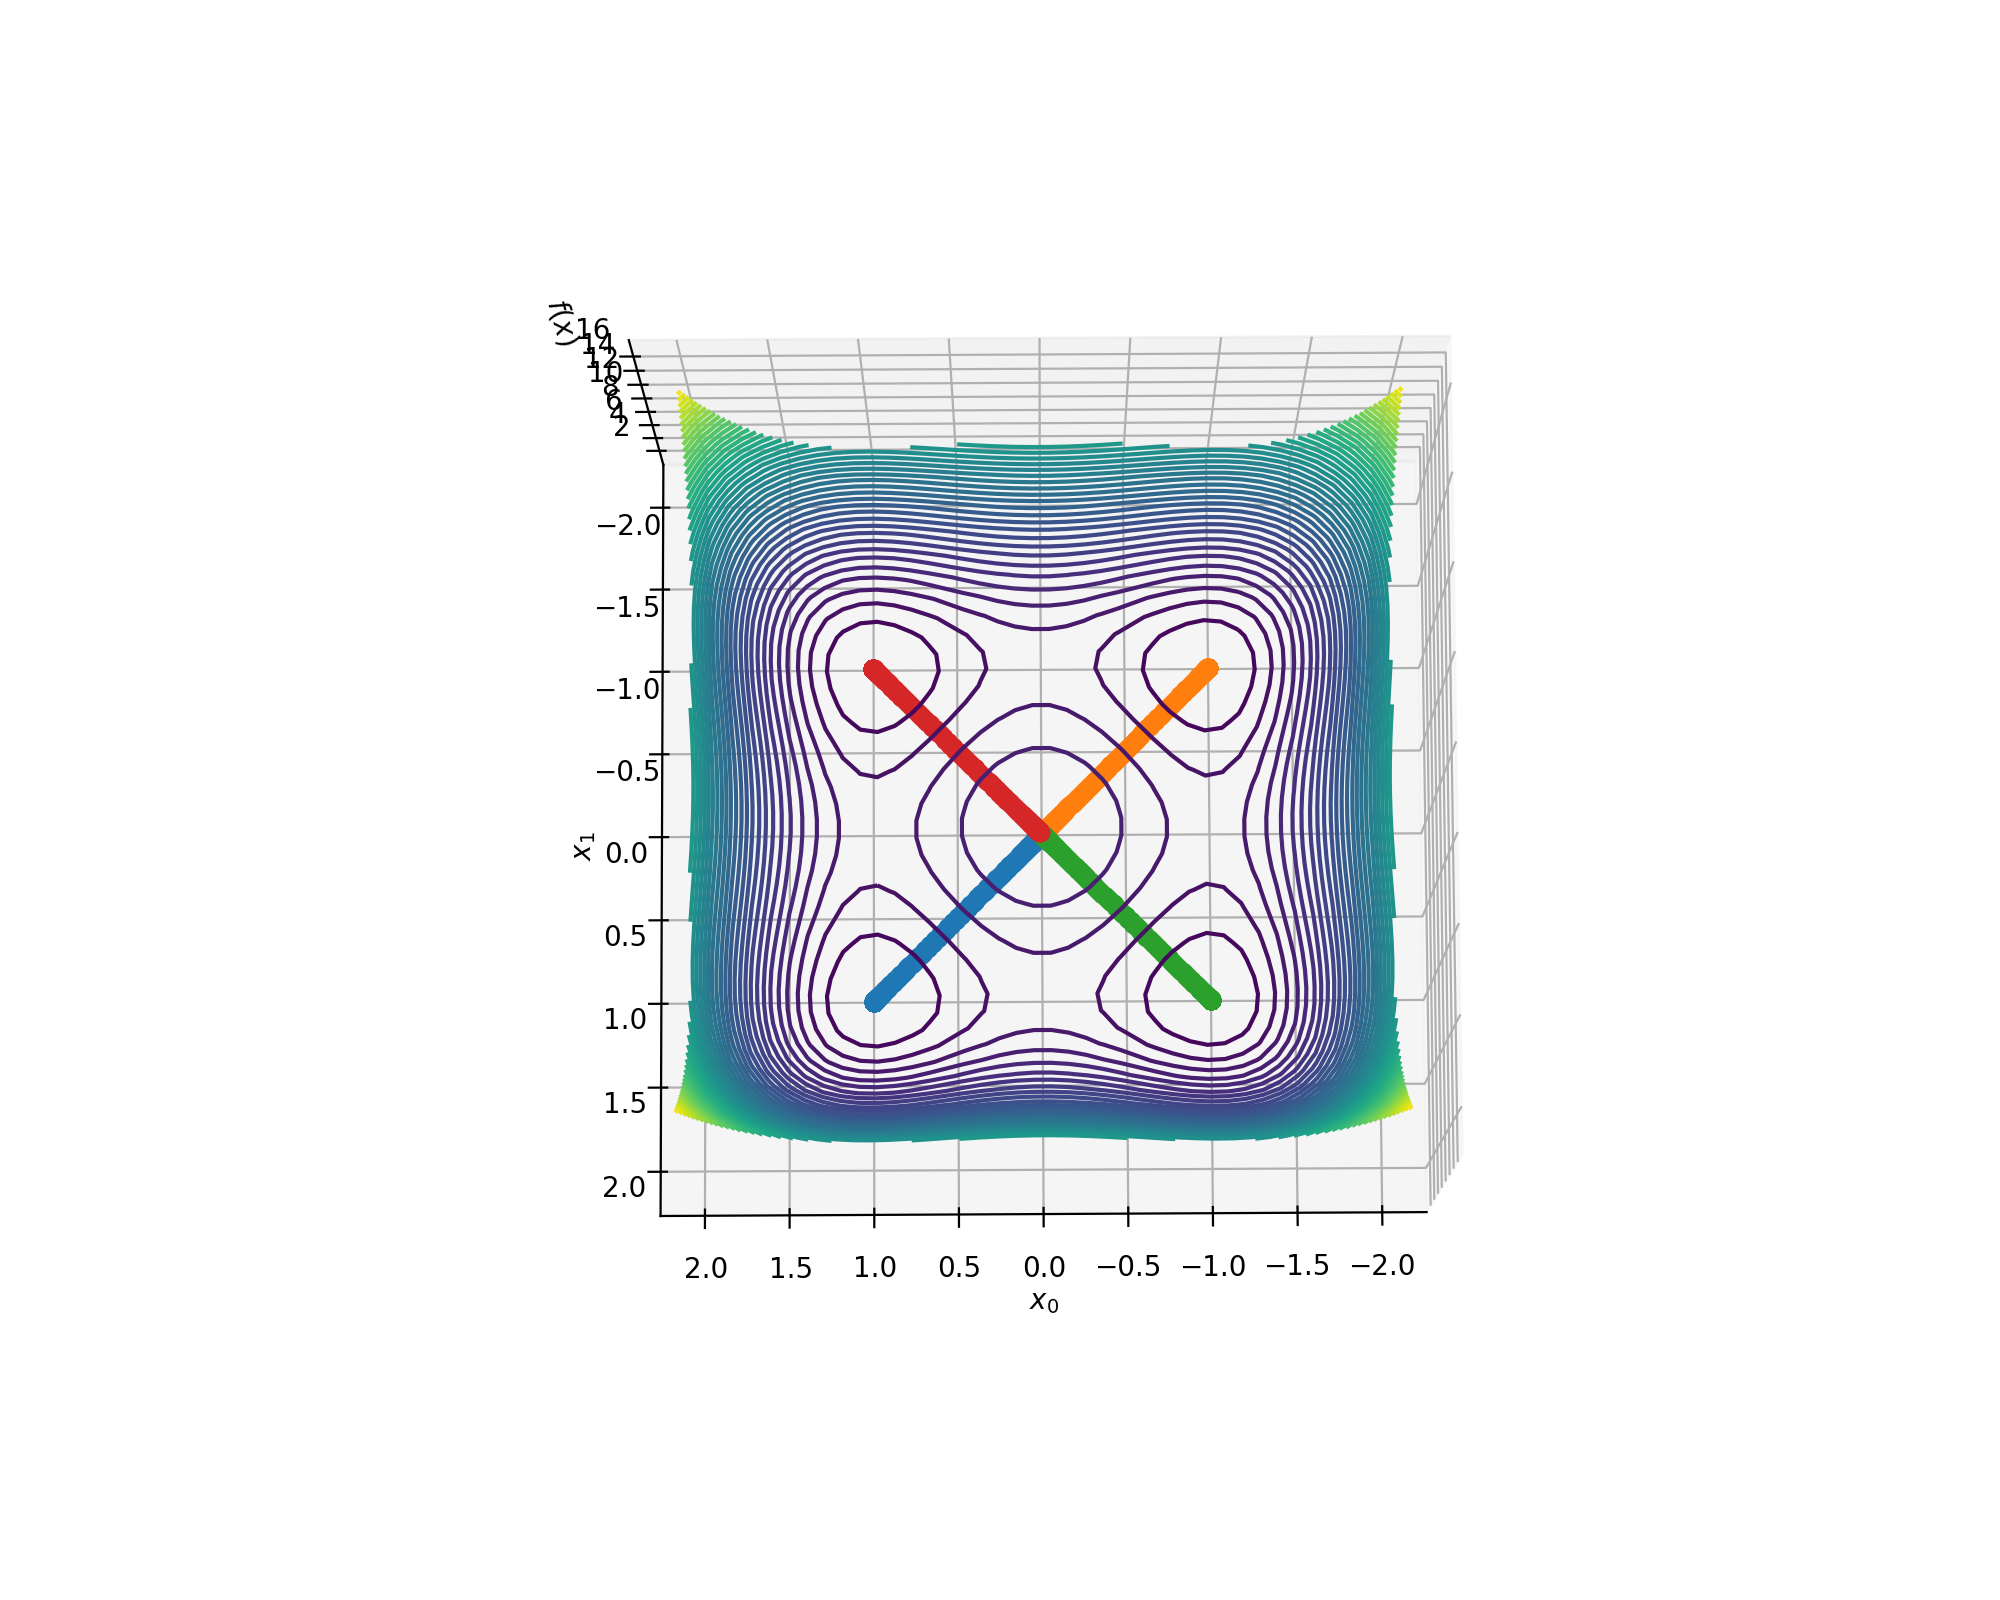

In [32]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Double well function and gradient
def double_well_f(x, a=1, b=1):
    return a * ((x[0]**2 - b**2)**2 + (x[1]**2 - b**2)**2)

def double_well_df(x, a=1, b=1):
    grad_x = 4 * a * x[0] * (x[0]**2 - b**2)
    grad_y = 4 * a * x[1] * (x[1]**2 - b**2)
    return np.array([grad_x, grad_y])

# Numerical solver for the gradient descent dynamics
def solve_dynamics(target_df, x0, dt=0.01, max_time=10):
    time_steps = int(max_time / dt)
    trajectory = np.zeros((time_steps, 2))
    x = np.array(x0)

    for i in range(time_steps):
        gradient = target_df(x)
        x = x - dt * gradient
        trajectory[i] = x

    return trajectory

# Define the grid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))
Z = double_well_f(np.array([X, Y]))

# Close starting points for sensitivity analysis
starting_points = [
    (np.array([0.01, 0.01]), np.array([-0.01, -0.01])),
    (np.array([-0.01, 0.01]), np.array([0.01, -0.01]))
]

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Running the dynamics solver for each pair of starting points
for pair in starting_points:
    for start in pair:
        trajectory = solve_dynamics(double_well_df, start, dt=0.01, max_time=10)
        ax.plot(trajectory[:, 0], trajectory[:, 1], np.zeros(trajectory.shape[0]), linewidth=2, marker='o')

ax.view_init(30, 45)
plt.show()


^^ we further illustrate the point of attracting equilibria and repelling equilibria. here we place 4 particles, close the the maximum and see all 4, no matter how close to point of equilibrium were looking at(max) they particle move away from each other. each diverging to an attracting equilibria, well.